# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [158]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

# Import stats module from SciPy.
import scipy.stats as sts

# Files to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [57]:
# Get the unique values of the type of city.
city_df["type"].unique()
# Get the number of data points from the Urban cities.
sum(city_df["type"]=="Urban")
# Get the number of data points from the Suburban cities.
sum(city_df["type"]=="Suburban")
# Get the number of data points from the Rural cities.
sum(city_df["type"]=="Rural")

18

### Merge the DataFrames

In [58]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [86]:
# Create DataFrames for each city type.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [60]:
#  1. Get the total rides for each city type

rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_type

# Get the sum of all the fares.
total_rides = pyber_data_df["ride_id"].count()
total_rides

# # Rides for urban cities.
# urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# total_urban_rides = sum(urban_ride_count)

# # Rides for suburban cities
# suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
# total_suburban_rides = sum(suburban_ride_count)

# # Rides for rural cities
# rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
# total_rural_rides = sum(rural_ride_count)

2375

In [87]:
# 2. Get the total drivers for each city type

drivers_by_type = city_df.groupby(["type"]).sum()["driver_count"]
drivers_by_type

# Get the sum of all the fares.
# total_drivers = pyber_data_df["driver_count"].sum()
# total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [88]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [89]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride =  sum_fares_by_type / rides_by_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [93]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver =  sum_fares_by_type / drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [118]:
#  6. Create a PyBer summary DataFrame. 
# Adding a list of values with keys to create a new DataFrame.
pyber_summary_df = pd.DataFrame(
          {
          "Total Rides": rides_by_type,
          "Total Drivers": drivers_by_type,
          "Total Fares": sum_fares_by_type,
          "Average Fare per Ride": avg_fare_per_ride,
          "Average Fare per Driver": avg_fare_per_driver})


In [119]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [120]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)


# district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].map("{:.2f}".format)

# district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].map("{:.2f}".format)

# district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].map("{:.1f}".format)

# district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].map("{:.1f}".format)

# district_summary_df["% Overall Passing"] = district_summary_df["% Overall Passing"].map("{:.1f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [121]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [130]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
dates = pyber_data_df["date"].unique()

rides_by_date = pyber_data_df.groupby(["date","type"]).sum()["fare"]
rides_by_date

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [131]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
rides_by_date = rides_by_date.reset_index()


In [133]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

rides_by_date_pivot = rides_by_date.pivot(index="date", columns="type", values="fare")
rides_by_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [228]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
rides_by_date_pivot.loc['2019-01-01':'2019-04-29']
rides_by_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [229]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 7.
rides_by_date_pivot.index = pd.to_datetime(rides_by_date_pivot.index)
rides_by_date_pivot



type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [231]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
rides_by_date_pivot = rides_by_date_pivot.resample("W").sum()
rides_by_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


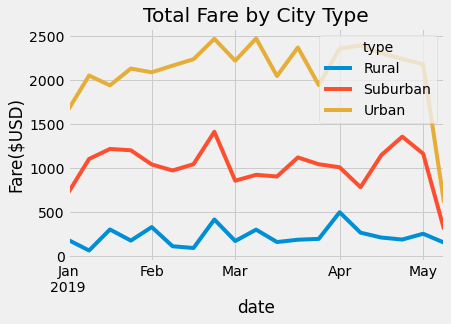

In [250]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Set x-axis and tick locations.
x_axis = np.arange(len(rides_by_date_pivot))
# Plot the data.
rides_by_date_pivot.plot()
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")
plt.savefig("analysis/PyBer_fare_summary.png")
plt.figsize
plt.show()